<a href="https://colab.research.google.com/github/digital-science/dimensions-api-lab/blob/master/3-workshops/2019-09-Rome-University-ISSI-conference/3-Rome-Publications-Citations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Dimensions API Lab In Google Colab"/></a>

# 3. Publications Citations 

This Notebook shows how it's possible to extract basic indicators about Rome University programmatically, using the Dimensions API with Jupyter Notebooks. 


In [20]:
import dimcli
from dimcli.shortcuts import dslquery
import pandas as pd
from pandas.io.json import json_normalize
import plotly_express as px
from plotly.offline import init_notebook_mode # needed for exports 
init_notebook_mode(connected=True)

Dimensions data source are mined for organizations identifiers using GRID, the [Global Research Identifier Database](https://grid.ac/). So we can use GRID IDs to perform searches across all source in Dimensions. 

The GRID ID for Rome La Sapienza is [grid.7841.a](https://grid.ac/institutes/grid.7841.a). 


In [21]:
GRIDID = "grid.7841.a"

## Publications most cited in last 2 years

In [22]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" 
return publications[doi+title+recent_citations+journal+type] sort by recent_citations""")
df = data.as_dataframe()
df.head(20)

Returned Publications: 20 (total = 120707)


,doi,journal.id,journal.title,recent_citations,title,type
0,10.1051/0004-6361/201525830,jour.1026093,Astronomy and Astrophysics,2305,Planck 2015 results - XIII. Cosmological param...,article
1,10.1016/s0140-6736(14)60460-8,jour.1077219,The Lancet,2117,"Global, regional, and national prevalence of o...",article
2,10.1103/physrevlett.116.061102,jour.1018277,Physical Review Letters,1799,Observation of Gravitational Waves from a Bina...,article
3,10.1103/physrevlett.119.161101,jour.1018277,Physical Review Letters,1679,GW170817: Observation of Gravitational Waves f...,article
4,10.1080/15548627.2015.1100356,jour.1036458,Autophagy,1240,Guidelines for the use and interpretation of a...,article
5,10.1007/s00134-017-4683-6,jour.1313639,Intensive Care Medicine,1023,Surviving Sepsis Campaign: International Guide...,article
6,10.1038/nmat1368,jour.1031408,Nature Materials,906,Nanostructured materials for advanced energy c...,article
7,10.1103/physrevlett.116.241103,jour.1018277,Physical Review Letters,869,GW151226: Observation of Gravitational Waves f...,article
8,10.1103/physrevlett.118.221101,jour.1018277,Physical Review Letters,820,GW170104: Observation of a 50-Solar-Mass Binar...,article
9,10.1016/s1470-2045(11)70393-x,jour.1023279,The Lancet Oncology,723,Erlotinib versus standard chemotherapy as firs...,article


## Publications most cited - all time

In [23]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+times_cited+journal+type+year] sort by times_cited limit 1000""")
df = data.as_dataframe()
df.head(5)

Returned Publications: 1000 (total = 120707)


,doi,journal.id,journal.title,times_cited,title,type,year
0,10.1038/nmat1368,jour.1031408,Nature Materials,5790,Nanostructured materials for advanced energy c...,article,2005
1,10.1016/s0140-6736(14)60460-8,jour.1077219,The Lancet,4950,"Global, regional, and national prevalence of o...",article,2014
2,10.1016/j.physletb.2012.08.020,jour.1094748,Physics Letters B,4608,Observation of a new particle in the search fo...,article,2012
3,10.1016/j.physletb.2012.08.021,jour.1094748,Physics Letters B,4543,Observation of a new boson at a mass of 125 Ge...,article,2012
4,10.1073/pnas.0510565103,jour.1082971,Proceedings of the National Academy of Sciences,4064,A microRNA expression signature of human solid...,article,2006


## Publications most cited by year of publication

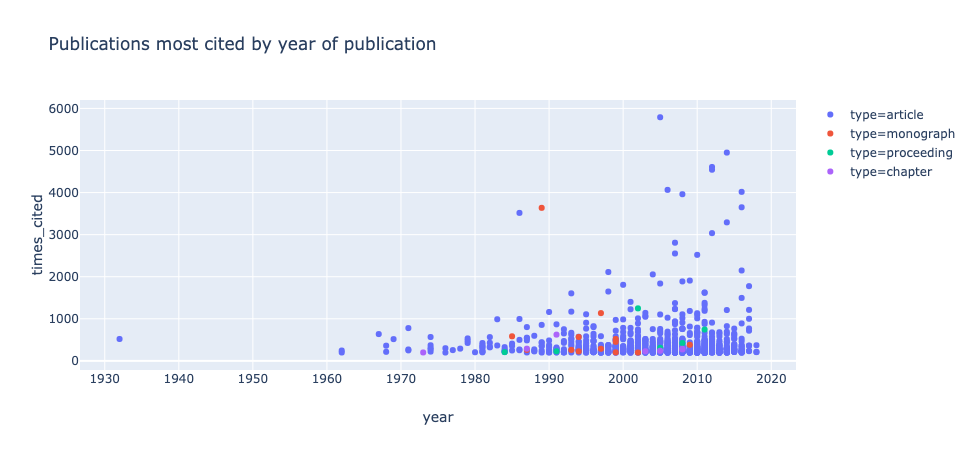

In [24]:
px.scatter(df, x="year", y="times_cited", color="type", hover_name="title", 
           hover_data=['type', 'doi', 'year', 'times_cited', 'journal.title'], 
           height=600, title="Publications most cited by year of publication")

## Publications most cited by journal title

In [25]:
df_subset = df.query("times_cited>100")

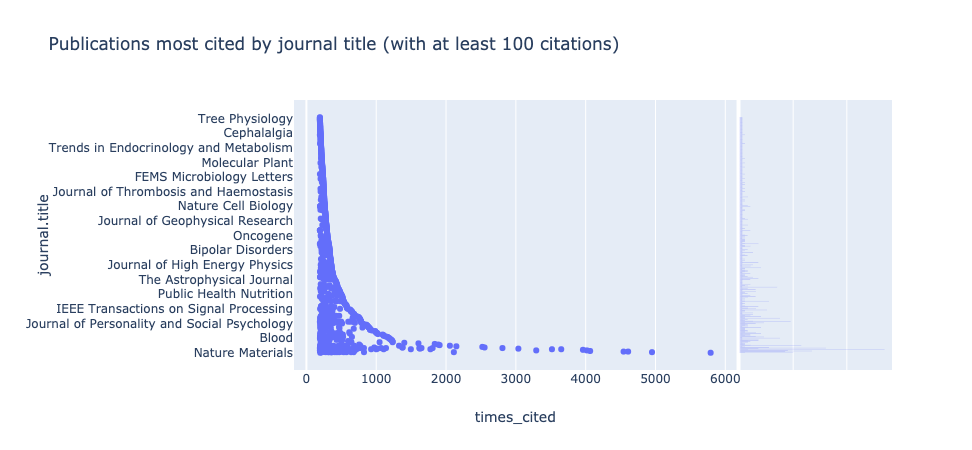

In [26]:
px.scatter(df_subset, y="journal.title", x="times_cited", hover_name="title", marginal_y="histogram",
           hover_data=['type', 'doi', 'year', 'times_cited', 'journal.title'], 
           height=600, title="Publications most cited by journal title (with at least 100 citations)")

## Publications most cited by subject area

Dimensions data include several categorizations, but for this we will use the [Field of Research (FOR)](https://www.arc.gov.au/grants/grant-application/classification-codes-rfcd-seo-and-anzsic-codes) system covering all areas of research from the Australian and New Zealand Standard Research Classification (ANZSRC). 

In [33]:
data = dslquery(f"""search publications where research_orgs.id="{GRIDID}" return publications[doi+title+FOR+times_cited+journal+type] sort by times_cited limit 1000""")

Returned Publications: 1000 (total = 120707)


The FOR structure for a single publication is like this: 

```{'FOR' : 
    [{'id': '3292', 'name': '1402 Applied Economics'}, 
     {'id': '3177', 'name': '1117 Public Health and Health Services'}]} ..etc..
```
Some of the results may not have an associated FOR code (eg because the abstract is not available) so first we want to ensure all JSON data have a valid Field of Research (FOR) code key.Also, we want to break them up cause each publication can have more than one code.


In [34]:
for x in data.publications:
    if not 'FOR' in x:
        x['FOR'] = ""
    else:
        x['FOR'] = [{'name' : x['name'][5:]} for x in x['FOR']] # also remove the digit prefix to improve legibility

Now let's create a new dataframe with the FOR data and preview it.

In [35]:
df = json_normalize(data.publications, record_path='FOR', meta=['doi', 'title', 'times_cited', ['journal', 'title']], errors='ignore' )
df.head()

,name,doi,title,times_cited,journal.title
0,Physical Chemistry (incl. Structural),10.1038/nmat1368,Nanostructured materials for advanced energy c...,5790,Nature Materials
1,Macromolecular and Materials Chemistry,10.1038/nmat1368,Nanostructured materials for advanced energy c...,5790,Nature Materials
2,Materials Engineering,10.1038/nmat1368,Nanostructured materials for advanced energy c...,5790,Nature Materials
3,Inorganic Chemistry,10.1038/nmat1368,Nanostructured materials for advanced energy c...,5790,Nature Materials
4,Public Health and Health Services,10.1016/s0140-6736(14)60460-8,"Global, regional, and national prevalence of o...",4950,The Lancet


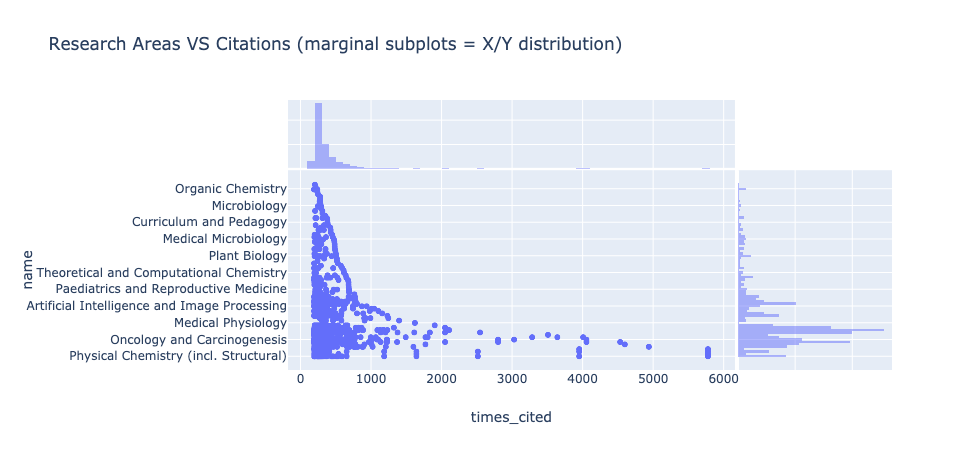

In [36]:
px.scatter(df, x="times_cited", y="name", hover_name="name", hover_data=['times_cited'],
           marginal_x="histogram", marginal_y="histogram", 
           height=900, title="Research Areas VS Citations (marginal subplots = X/Y distribution)")

## Combining the previous two charts ...

Focusing on the top 100 publications to keep the chart readable...

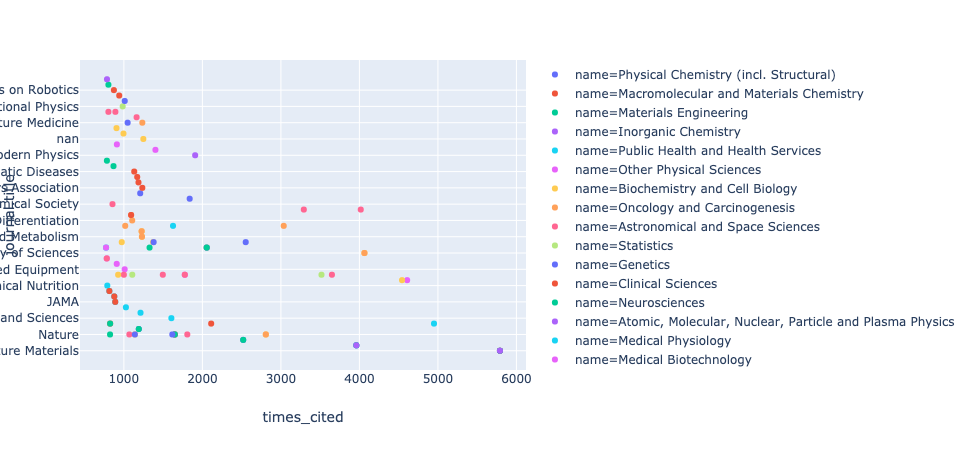

In [38]:
px.scatter(df.head(100), x="times_cited", y="journal.title", color="name")

---
# Activities

* Try repeating the same analysis for a different organization listed in the [Global Research Identifier Database](https://grid.ac/)
* Try modifying the initial result set eg by adding a keyword search `search publications for "malaria" ...` and see how results change

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 